데이터 및 코드: https://github.com/datascienceabe/study_open/tree/master/Multivariate_data_analysis

데이터: http://www-bcf.usc.edu/~gareth/ISL/<br>
참고:https://medium.com/bluekiri/understanding-principal-component-analysis-once-and-for-all-9f75e7b33635<br>
Rencher, A. C., & Schaalje, G. B. (2008). Linear models in statistics. John Wiley & Sons.<br>
James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning (Vol. 112, p. 18). New York: springer.<br>


9장<br>
목차<br>
1. Multicollinearity의 원인과 문제점
2. Multicollinearity의 진단
3. Model Respecification

# 1. Principal Component Analysis

<b>1) PCA 목적<br></b>

- 차원을 축소하면 데이터에 대한 정보가 소실 되지만 가능한 원래 데이터의 정보를 보존하고 싶음<br>
- 차원 추소를 할 때 가능한 원래 데이터의 variance를 보존<br>
- 만약 variance가 큰 predictor끼리 너무 비슷하면(highly correlated) 정보가 중복되어 버림<br>
=> 따라서 PCA는 차원 축소를 할 때 원래 데이터의 variance를 가능한 보존하면서도 데이터를 uncorrelated하게 만드는 것이 목표

이 문제를 데이터를 Orthogonal Transformation을 통해 해결하고자 함

<b>2) Linear Algebra</b>

데이터 : $X_{(nxp)} $ 각 열에 대해 centering 된 데이터<br> 
Sample Covariance Matrix: $\Sigma=cov(X)=\frac{1}{n-1}X^{'}X$<br>
Sample Covariance는 diangonal element가 sample variance, off-diagonal이 변수 간의 sample correlation으로 symmetric matrix<br>
=> $\Sigma=\Sigma^{'}$ (symmetric)<br>
=> (Positive semi )
=> Variance가 첫 번째 관심사이기 때문에 Variance 부터 전개함

$Z_{(nxp)}$: $X$를 transformation 해서 만들고자 하는 대상으로 uncorrelated <br>
=> Z는 diagonal matrix<br>
=> diagonal element에는 정보가 큰 순서대로 있음<br>
=> Z는 linearly independent


$\Sigma$는 Symmetric matrix이기 때문에 spectral decomposition에 의해 $\Sigma=A\Lambda A^{'}$가 되게 하는 $A$가 존재<br>
여기서 $\Lambda=Diag(\lambda_{1},...,\lambda_{n})$<br>
$A$의 columns는 $\Sigma$의 eigenvalue에 대응되는 orthonormal eigenvector<br>
$A$는 orthonormal이기 때문에 $AA=I$하고 Idempotent하고 $A^{'}=A$

$Z=XA_{(pxp)}$를 만드는 projection $A$ 찾는 것이 목표

$COV(Z)=COV(XA)=A^{'}COV(X)A =A^{'}(A\Lambda A^{'})A=\Lambda $<br>
결국 우리가 원하는데로 transformation 된 $Z$의 variance는 Sample Covariance의 eigenvalue<br>
따라서 $X$의 총 variance와 $Z$의 총 variance는 같고 이는 $trace(\Lambda)$

<b>3) Iterative Approach</b>

$Z_{(nxp)}=X_{(nxp)}A_{(pxp)}$

$X=[X_{1},...,X_{p}]$<br>
$A=[\alpha_{1},....\alpha_{p}]$<br>
$Z=[Z_{1},....Z_{p}]$<br>


$X_{1},...,X_{p}$의 첫 번째 principal component<br>
$Z_{1}=X_{1}\alpha_{1}^{'}$: first column of Z<br>
<br>
constraints:$\sum_{j}^{p} \alpha_{j1}^{2}=1$ =>Normalize해서 분산이 너무 커지는 것 방지<br>
$\alpha_{1}^{'}$: first principal component의 loading vector 라고 불리움<br>
first principal component가 가장 큰 varaince 갖음

loading vector를 구하기 위한 목적 함수는 다음과 같음<br>
$\arg\max_{\alpha^{'}} \frac{1}{n}\sum_{i=1}^{n}(\sum_{j=1}^{p}\alpha_{j1}x_{ij}  )^{2}  $ subject to $\sum_{j}^{p} \alpha_{j1}^{2}=1$

second principal component $Z_{2}$를 구하기 위해서는 $Z_{1}$과 uncorrelated 하게 만들기 위해 방향 벡터라고 할 수 있는 loading $\alpha_{1}^{'}$를 $\alpha_{2}^{'}$과 orthogonal 하게 만들어줌<br>
즉 위의 식에 하나의 제약식이 추가 되는 것

<b>4) PCA의 해석</b><br>
1) PC loading vector<br>
데이터 공간에서 변동이 큰 쪽으로 뱡향<br>
<br>
2) PC Scores<br>
PC loading 방향으로의 projection<br>
<br>
3) Principal Component<br>
Princial component는 관측치에 가장 가까운 linear surface를 제공<br>
PC1은 p차원의 공간에서 n개의 데이터 거리상 가장 가까운 직선임<br>

<b>5) Scaling의 중요성</b><br>
PCA 결과는 scaling에 영향을 많이 받음<br>
- 데이터의 범위가 큰 변수가 있으면 변동성이 커져 그 변수에 대한 loading vector도 커짐
- 보통 표준편차로 scaling 해줌

<b>6)Uniqueness</b><br>
<u>PCA의 Loading vector는 sign은 바뀔 수 있지만 unique함</u>

# 2. 데이터 분석과 시각화

USArrests Data<br>
미국 50개 주의 4가지 원인에 의한 체포율 데이터

In [3]:
X=USArrests
#normalization

pr.out=prcomp(USArrests, scale=TRUE)
names(pr.out)

[1] 50  4

<b>1) PC loading vector</b>

In [11]:
pr.out$center #mean
pr.out$scale #variance
pr.out$rotation #principal component loading vectors

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


loading vector를 볼 수 있습니다.$PC_{1}=\alpha_{1}^{'}$<br>
첫 번째 PC1은 Urban prop을 빼고는 비슷한 weight를 줬고 UrbanPop에는 더 적은 weight를 줬습니다<br>
=> 따라서 전체적인 범죄율 경향에 대응한다고 볼 수 있습니다<br>
첫 번째 PC1은 Urban prop에만 높은 가중치를 줬습니다<br>
=> 따라서 Urban prop의 범죄율 경향에 대략적으로 대응한다고 볼 수 있습니다<br>

<b>2) PC Score</b>

In [18]:
dim(pr.out$x) #transformed value

[1] 50  4

transformed 된 $Z$의 값입니다(Score)

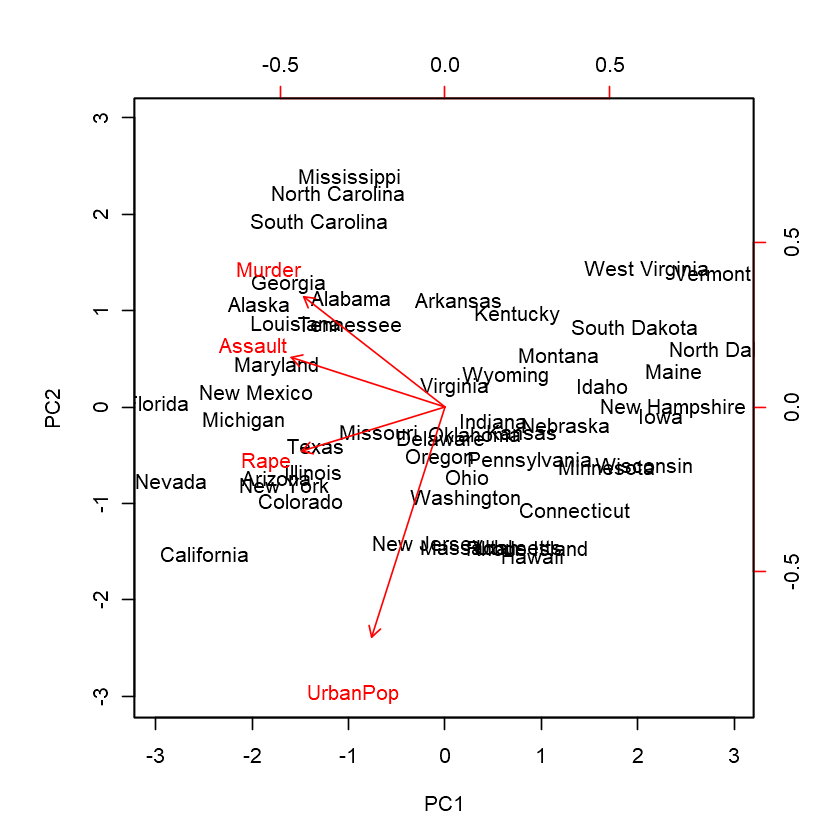

In [19]:
biplot(pr.out, scale=0)

위의 biplot에서 주 이름은 Score, 화살표는 loading vector의 값을 보여줍니다. 예를들어 Rape는 첫 번째 PC의 loading 값이 -0.53, 두 번째 PC의 loading 값이 -0.17이라 (-0.53,-0.17)에 위치합니다<br>
<br>
Loading을 보면 범죄 변수 중 Murder, Assault, Rape가 서로 가까이 위치하고 이 변수들은 서로 correlated 하다는 것을 의미합니다<br>
Score에서는 주 마다의 차이를 볼 수 있습니다<br>
California, Nevada, Florida는 첫 번째 PC1에서 높은 점수를 받아 범죄율이 높음을 암시합니다


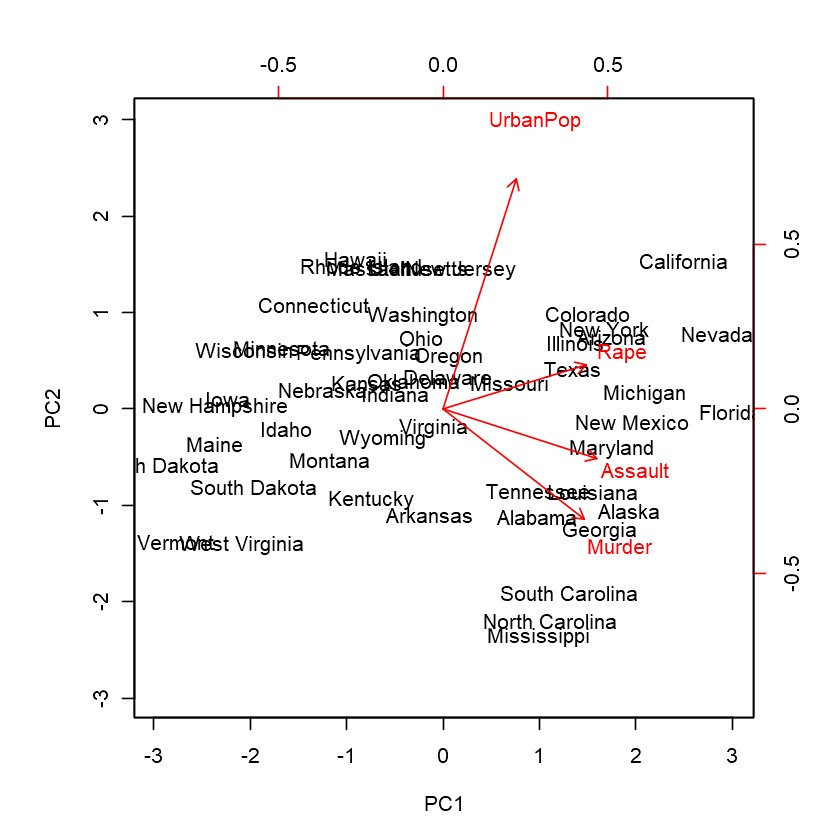

In [22]:
pr.out$rotation=-pr.out$rotation
pr.out$x=-pr.out$x
biplot(pr.out, scale=0)

<b>3) 변동성이 설명 되는 비율</b><br>
PCA projection을 통해 차원 축소하면 얼마 많은 정보를 잃을까?

PVE: Proportion of variance explained<br>
데이터 내의 총 $\sum_{j=1}^{p}Var(X_{j})$<br>
$m$번째 principal component에 의해 설명 되는 변동성 $ Var(Z_{j})$<br>
<br>
$PVE_{m}=\frac{Var(Z_{j})}{\sum_{j=1}^{p}Var(X_{j})}$

[1] 1.5748783 0.9948694 0.5971291 0.4164494

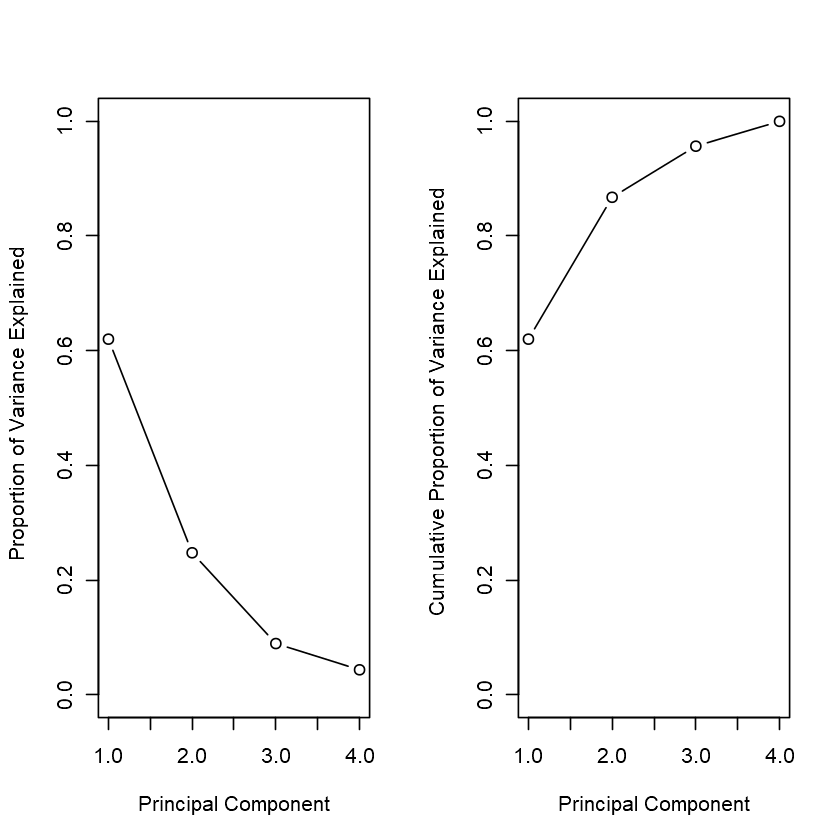

In [28]:
par(mfrow=c(1,2))
pr.out$sdev
pr.var=pr.out$sdev^2
pve=pr.var/sum(pr.var) #m th principal's variance/total variance
plot(pve, xlab="Principal Component", ylab="Proportion of Variance Explained", ylim=c(0,1),type='b')
plot(cumsum(pve), xlab="Principal Component", ylab="Cumulative Proportion of Variance Explained", ylim=c(0,1),type='b')


첫 번째 PC1이 데이터의 변동성의 62퍼센트를 설명<br>
첫 두개 의 PC가 87퍼센트이 변동성 설명

[1]  1  3 11  8

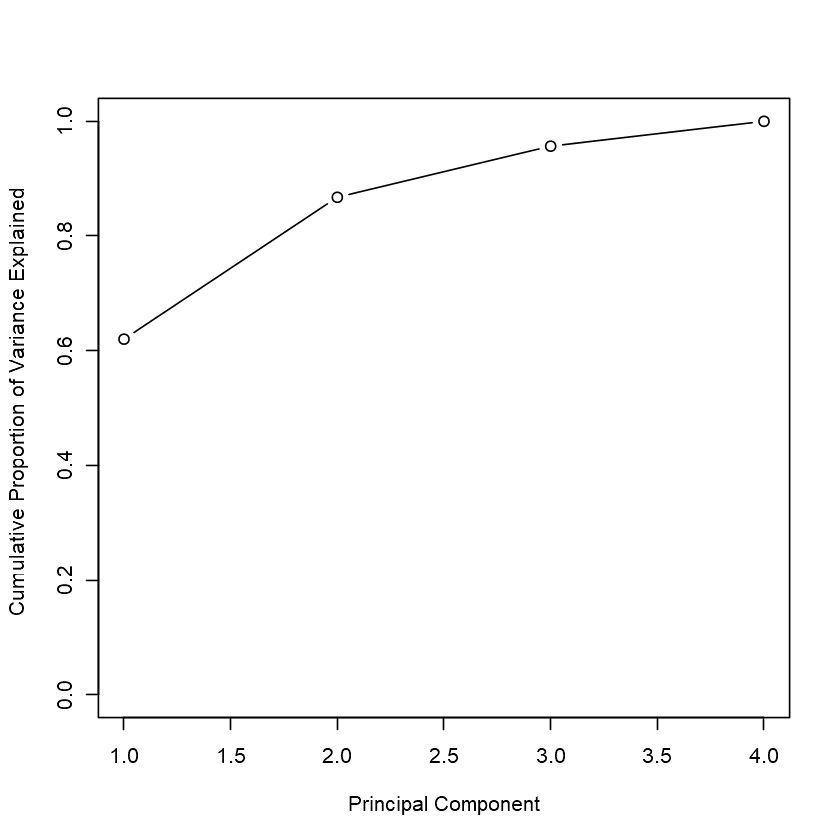

In [26]:

a=c(1,2,8,-3)
cumsum(a)